# Regresión

## Regresión lineal simple

Predicción de salarios en base de años de experiencia

* X: años de Experiencia
* x: Salario

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/salaries_experience.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


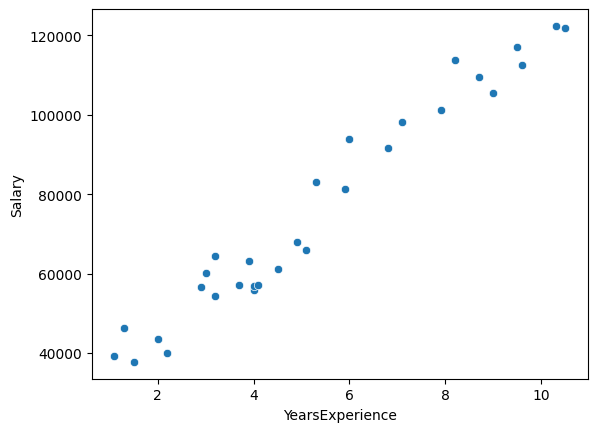

In [4]:
sns.scatterplot(data=df, x='YearsExperience', y='Salary');

In [5]:
X = df[['YearsExperience']] # sacar la columna
df.iloc[:, 0]

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [6]:
X = df[['YearsExperience']]
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [7]:
X = df[['YearsExperience']]
X[:3]

,YearsExperience
0,1.1
1,1.3
2,1.5


In [8]:
y = df[['Salary']]
y[:3]

,Salary
0,39343.0
1,46205.0
2,37731.0


In [9]:
from sklearn.linear_model import LinearRegression

# 1. Crear modelo
model = LinearRegression()

# 2. Entrenar el modelo
model.fit(X, y) # aprender la relación entre las 2 columnas

# es lo mismo que lo de qrriva pero más detallado
#model.fit(df[['YearsExperience']], df['Salary'])

# 3. Predicciones

model.predict([[4]]) # Predicción para (4, 9, 7... (dependiendo la predicción que quiero)) años de experiencia

c:\Users\funda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[63592.04948449]])

In [10]:
# nuevos años de experiencia

X_new_years = pd.DataFrame({'YearsExperience': [7.5, 4, 2, 8]})

y_new_years = model.predict(X_new_years)
y_new_years

array([[ 96666.91760958],
       [ 63592.04948449],
       [ 44692.12484158],
       [101391.89877031]])

In [11]:
X_employees = pd.DataFrame({'YearsExperience': [6 , 4, 2, 8]})



X_employees['Salary'] = model.predict(X_employees)
X_employees

,YearsExperience,Salary
0,6,82491.974127
1,4,63592.049484
2,2,44692.124842
3,8,101391.898770


In [12]:
y = model.intercept_ + model.coef_ * 7.5
y

array([[96666.91760958]])

In [13]:
# Com¡ncatenar original con las predicciones
df_all = pd.concat([df, X_employees], ignore_index=True)
df_all

,YearsExperience,Salary
0,1.1,39343.000000
1,1.3,46205.000000
2,1.5,37731.000000
3,2.0,43525.000000
4,2.2,39891.000000
5,2.9,56642.000000
6,3.0,60150.000000
7,3.2,54445.000000
8,3.2,64445.000000
9,3.7,57189.000000


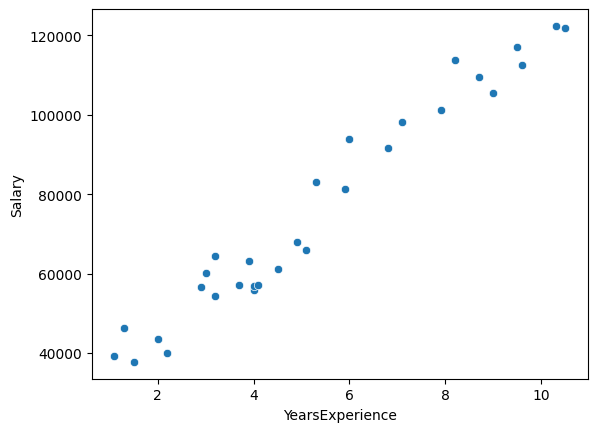

In [14]:
sns.scatterplot(data=df, x='YearsExperience', y='Salary');

In [15]:
X = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


<Axes: xlabel='YearsExperience', ylabel='Salary'>

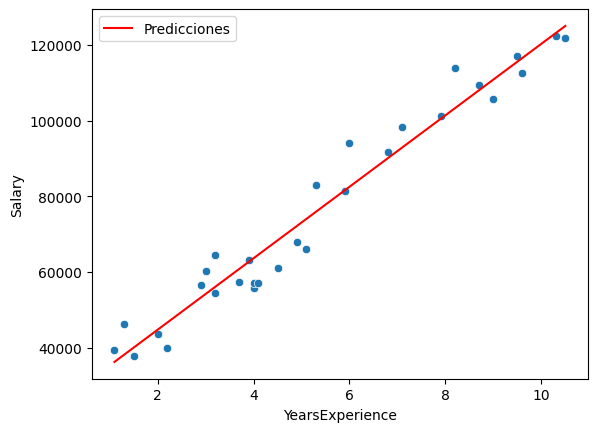

In [16]:
sns.scatterplot(data=df, x='YearsExperience', y=df['Salary'])
sns.lineplot(x=df['YearsExperience'], y=y_pred, color='r', label='Predicciones')

# Particionamiento datos

* Entrenamiento: 80%
* Validación o test: 20%
* Posibles combinaciones:
 

In [17]:
df = pd.read_csv('../../data/salaries_experience.csv')

In [18]:
X = df[['YearsExperience']]
y = df['Salary']

In [20]:
from sklearn.model_selection import train_test_split

# 80%: X_train, y_train
# 20%: X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape} {y_train.shape}")
print(f"Test: {X_test.shape} {y_test.shape}")

Entrenamiento: (24, 1) (24,)
Test: (6, 1) (6,)


In [21]:
X_train

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2
16,5.1
5,2.9
13,4.1
11,4.0
22,7.9


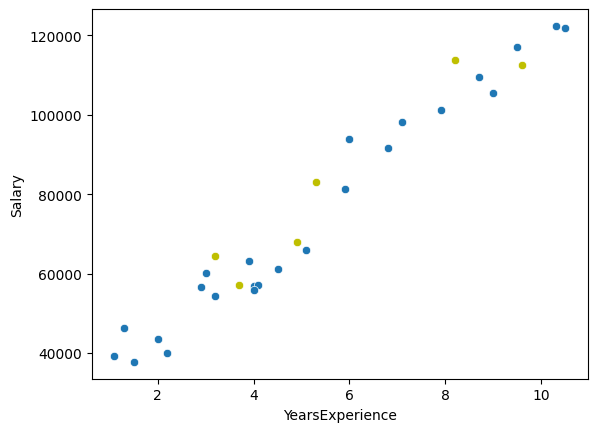

In [26]:
sns.scatterplot(x=X_train['YearsExperience'], y=y_train)
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, c='y'); # el C es color

In [28]:
model = LinearRegression()
model.fit(X_train, y_train) # datos entrenamiento

LinearRegression()

In [30]:
y_pred = model.predict(X_test) # datos de test

<Axes: xlabel='YearsExperience', ylabel='Salary'>

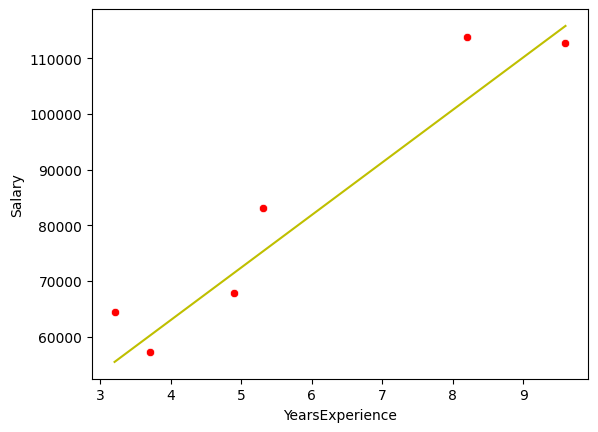

In [33]:
# Test VS Predicción 
# Il faut faire une comparaison

sns.scatterplot(x=X_test['YearsExperience'], y=y_test, c='r') # Test
sns.lineplot(x=X_test['YearsExperience'], y=y_pred, c='y') # predicción

## Error

MAE: Mean Absolute Error

mean_absolute_error

Es la media del valor absoluto de los errores entre las preducciones y los valores reales. Miede cuánto se desvían en promedio las predicciones del modelo de los valores reales.

Error = y_test - y_pred

In [35]:
from sklearn.metrics import mean_absolute_error

# Posible cantidad de margen de salario que el modelo se equivoca
# menos es mejor
mean_absolute_error(y_test, y_pred)

6286.453830757749

## Error MSE y RMSE

Mean Squared Error o Error Cuadrático Medio

* Mide la diferencia entre los valores reales y los valores predichos por el modelo.
* La diferencia con la MAE es que el MSE toma la media de los cuadrado de los errores.
* MSE eleva al cuadrado los errores antes de hacer la media, lo que significa que da más peso a los errores grandes que a los pequeños.

RMSE: Root Mean Squared Error

* Es la raíz cuadrada del MSE, se usa para que la salida no esté elevada al cuadrado y se pueda

In [37]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# rmse = np.sqrt(mse)

print(f'mse: {mse}')
print(f'rmse: {rmse}')

mse: 49830096.85590839
rmse: 7059.04362190151
